# Gathering

In [516]:
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import re
import json
import matplotlib.pyplot as plt
import os
import timeit
%matplotlib inline
import seaborn as sns
sns.set_context(context='notebook')
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('darkgrid')


In [517]:
#load twitter-archive-enhanced data frame
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [518]:
# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [519]:
#twitter api,secret key,access token and secret token
auth = tw.OAuthHandler('tPzhNRjCHOCTCdlYeTWOUFCuT', 'QtnFkh64wJsYc8r486mfuwOKAo8IOtXwYJBQZdfhgjwf7PNYFW')
auth.set_access_token('849134081262718976-KyDZvLmZIeWCM6rHiKKId3KyaicnunG', '6Keu1wGxcq0UHdsSXZqwti6qLoTcGkICJYCsaRgh28k03')
api = tw.API(auth, wait_on_rate_limit=True)

In [520]:
#extract tweets data from twitter api based on tweet_id from archive dataframe
#use timeit.timeit() to calculate process time
start = timeit.timeit()
print("hello")
#make a list of tweet_id that may be deleted or have no status
errors = []
#Creating the 'tweet_json.txt' that contains Each tweet's JSON data in its own line
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in df_archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)
end = timeit.timeit()
print(end - start)

hello
Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704

Rate limit reached. Sleeping for: 346


Error on tweet id 754011816964026368;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 453


0.007969699996465351


In [521]:
#read tweet_json.txt file and create a pandas DataFrame
#Pandas DataFrame contains id,retweet count and favorite count
tweet_list = []
with open ('tweet_json.txt','r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_list.append(tweet)

# check the tweets list
tweet_df = pd.DataFrame(tweet_list,columns = ['id','retweet_count','favorite_count'])

In [522]:
#calculate length of errors list
len(errors)

25

In [523]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [524]:
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7340,34964
1,892177421306343426,5473,30270
2,891815181378084864,3621,22778
3,891689557279858688,7526,38233
4,891327558926688256,8102,36511


In [525]:
#save the api dataFrame to a csv file
api_df = tweet_df.to_csv(r'api_df.csv',index = False)

# Assessing

In [526]:
#load api,archive and image dataframes
api_df = pd.read_csv('api_df.csv')
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_image = pd.read_csv('image-predictions.tsv',sep ='\t')

In [527]:
api_df

,id,retweet_count,favorite_count
0,892420643555336193,7340,34964
1,892177421306343426,5473,30270
2,891815181378084864,3621,22778
3,891689557279858688,7526,38233
4,891327558926688256,8102,36511
...,...,...,...
2326,666049248165822465,38,93
2327,666044226329800704,122,259
2328,666033412701032449,39,107
2329,666029285002620928,41,117


In [528]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [529]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2583.542257,7300.669241
std,6.823170e+16,4370.389866,11341.894337
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,524.000000,1263.000000
50%,7.182469e+17,1205.000000,3164.000000
75%,7.986692e+17,2989.000000,8927.000000
max,8.924206e+17,74154.000000,150298.000000


In [530]:
api_df.shape

(2331, 3)

**api dataframe
contains 2331 rows,'id' column is integer not string

In [531]:
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [532]:
df_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

In [533]:
#extract a list of names less than 4 letters
letters = []
for i in df_archive.name:
    if len(i) < 4:
        if i not in letters:
            letters.append(i)
print(letters)

['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'not', 'Mia', 'one', 'Ike', 'Mo', 'Bo', 'Tom', 'Alf', 'Sky', 'Tyr', 'Moe', 'Sam', 'Ito', 'Doc', 'mad', 'Jay', 'Mya', 'an', 'O', 'Al', 'Lou', 'my', 'Eve', 'Dex', 'Ace', 'Zoe', 'Blu', 'his', 'all', 'Sid', 'old', 'Ole', 'Bob', 'the', 'Obi', 'by', 'Evy', 'Tug', 'Jeb', 'Dot', 'Mac', 'Ed', 'Taz', 'Cal', 'JD', 'Pip', 'Amy', 'Gin', 'Edd', 'Ben', 'Dug', 'Jo', 'Ron', 'Stu']


In [534]:
#text of tweets containing names with 3 letters or less
#assign pd.options.display.max_colwidth to 250 to show complete tweet text
pd.options.display.max_colwidth = 250
df = df_archive.loc[df_archive['name'].isin(letters)]
df[['text','name']]

,text,name
6,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax
13,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,Ted
16,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,Jim
49,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,Gus
53,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,Rey
...,...,...
2349,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,an
2350,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a


In [535]:
#extract a list of all names starting with lower case letters
#append them to a list called lowerletters to be used in cleaning
pattern = r'[a-z]'
lowerletters = [] 
for i in df_archive.name:
    if re.match(pattern, i):
        if i not in lowerletters:
            lowerletters.append(i)
print(lowerletters)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [536]:
#text of tweets containing names with lowercase
df = df_archive.loc[df_archive['name'].isin(lowerletters)]
df[['text','name']].head(50)

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


In [537]:
df[['text','name']].tail(50)

,text,name
1877,C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,a
1878,This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,a
1916,This is life-changing. 12/10 https://t.co/SroTpI6psB,life
1923,This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU,a
1936,This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd,one
1941,This is a heavily opinionated dog. Loves walls. Nobody knows how the hair works. Always ready for a kiss. 4/10 https://t.co/dFiaKZ9cDl,a
1955,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,a
1994,This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe,a
2001,This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt,light
2019,This is just impressive I have nothing else to say. 11/10 https://t.co/LquQZiZjJP,just


In [538]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Tango        1
Ito          1
Tino         1
Vince        1
Alf          1
Name: name, Length: 957, dtype: int64

__Names<br>
names were extracted after 'this is'<br>
names starting with uppercase letters are valid<br>
There are 109 rows containg incorrect names starting with lowercase letters and 745 with none values<br>
some names come after 'name' or 'named'__

In [539]:
df_archive.shape

(2356, 17)

In [540]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [541]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [542]:
#show rows where in_reply_to_status_id is not NaN
retweets_and_replies = df_archive[(df_archive['retweeted_status_id'].notnull()) | (df_archive['in_reply_to_status_id'].notnull())]
retweets_and_replies.shape

(259, 17)

In [543]:
onlytweets = df_archive[(df_archive['retweeted_status_id'].isna()) & (df_archive['in_reply_to_status_id'].isna())]
onlytweets.shape

(2097, 17)

In [544]:
df_archive['expanded_urls'].tail()

2351    https://twitter.com/dog_rates/status/666049248165822465/photo/1
2352    https://twitter.com/dog_rates/status/666044226329800704/photo/1
2353    https://twitter.com/dog_rates/status/666033412701032449/photo/1
2354    https://twitter.com/dog_rates/status/666029285002620928/photo/1
2355    https://twitter.com/dog_rates/status/666020888022790149/photo/1
Name: expanded_urls, dtype: object

In [545]:
df_archive['expanded_urls'].isnull().sum()

59

In [546]:
#rows with null replies,null retweets and null expanded_urls
onlytweets = df_archive[(df_archive['retweeted_status_id'].isna()) & (df_archive['in_reply_to_status_id'].isna()) & df_archive['expanded_urls'].isnull()]
onlytweets.shape

(3, 17)

In [547]:
#a list of maximum and minimum rating numerator
values = [1776,0]
num = df_archive.loc[df_archive['rating_numerator'].isin(values)]
pd.options.display.max_colwidth = 250
num['text']

315           When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
979                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX
Name: text, dtype: object

In [548]:
#a list of maximum and minimum rating denominator
values = [170,0]
den = df_archive.loc[df_archive['rating_denominator'].isin(values)]
pd.options.display.max_colwidth = 250
den['text']

313                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Name: text, dtype: object

In [549]:
denominator_values = df_archive.loc[df_archive['rating_denominator'] != 10]
denominator_values[['text','rating_denominator']]

,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [550]:
#rating_numerator values that are more than 15 and less than 4
numerator_values = df_archive.loc[(df_archive['rating_numerator'] > 15) |(df_archive['rating_numerator'] < 4)]
numerator_values[['text','rating_numerator']]

,text,rating_numerator
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
...,...,...
2326,This is quite the dog. Gets really excited when not in water. Not very soft tho. Bad at fetch. Can't do tricks. 2/10 https://t.co/aMCTNWO94t,2
2334,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,3
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1
2338,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1


In [551]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Tango        1
Ito          1
Tino         1
Vince        1
Alf          1
Name: name, Length: 957, dtype: int64

**in archive dataFrame 
dog stages are separated into four columns
some values in names column are missing[none] or incorrectly extracted as in lowernames list
259 rows contain retweets and replies
2097 rows contain only original tweets
There are 59 null expanded_urls values <br>
some rating_numerator values are incorrectly extracted from tweets text that has decimals<br>
rating numerator max 1776 and min 0<br>
rating denominator max 170 and min 0 <br>
timestamp is in string format not datetime<br>
remove unrequired columns from archive <br>
tweet_id column is an integer<br>

In [552]:
df_image.shape

(2075, 12)

In [553]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [554]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [555]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [556]:
df_image.loc[df_image['p1_dog'] == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [557]:
df_image.loc[df_image['p2_dog'] == True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [558]:
df_image.loc[(df_image['p1_dog'] == False)&(df_image['p2_dog'] == False)&(df_image['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [559]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**image DataFrame
header names('p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog')

# Assessing Summary

### Quality
1. 'id' column in api_df is integer not string<br>
2. some values in names column are missing(none) or incorrectly extracted (a,an)<br>
3. 259 (181+78) rows contain retweets and replies<br>
4. There are 59 null expanded_urls values only three of them with null retweets and replies<br>
5. some rating_numerator values are incorrectly extracted from tweets text that has decimals<br>
6. rating numerator max 1776 and min 0<br>
7. rating denominator max 170,min 0,and many other invalid values,all values should be 10<br>
8. timestamp is in string format not datetime<br>
9. tweet_id column is integer format not string<br>
10. some names in image Dataframe need to be adjusted<br>
11. multiple columns could be comined

### Tidiness
1. dog stages are in four separate columns<br>
2. image table headers names<br>
3. all three dataFrames could be merged into one<br>

# Cleaning

In [560]:
#make a copy of each DataFrame
api_copy = api_df.copy()
archive_copy = df_archive.copy()
image_copy = df_image.copy()

# Quality

### Wrong Datatype
'id' column is integer not string

Define<br>
change 'id' column format from integer to string using astype(),and set its name to be tweet_id to be the same on all dataframes

In [561]:
api_copy['tweet_id'] = api_copy['id'].astype(str)
api_copy.drop(['id'],inplace = True,axis = 1)

In [562]:
#test
api_copy

,retweet_count,favorite_count,tweet_id
0,7340,34964,892420643555336193
1,5473,30270,892177421306343426
2,3621,22778,891815181378084864
3,7526,38233,891689557279858688
4,8102,36511,891327558926688256
...,...,...,...
2326,38,93,666049248165822465
2327,122,259,666044226329800704
2328,39,107,666033412701032449
2329,41,117,666029285002620928


### Missing and incorrect Data
some values in names column are missing(none) or incorrectly extracted (a,an)

define<br>
check if name exists after name or named and replace with it<br>
change none and names starting with lowercase to NaN<br>

In [563]:
#make a regex pattern to extract names from text
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_copy.iterrows():  
    try:
        #assign the word that comes after 'name' or 'named' to be the name
        if row['name'] in lowerletters:
            c_name = re.findall(pattern_2, row['text'])[0]
            archive_copy.loc[index,'name'] = archive_copy.loc[index,'name'].replace(row['name'], c_name)
        #assign none name to be nan 
        elif row['name'] == 'None':
            archive_copy.loc[index,'name'] = np.nan
    except IndexError:
        archive_copy.loc[index,'name'] = np.nan

#show the value count for each name extracted            
archive_copy.name.value_counts(dropna = False)

NaN        832
Charlie     12
Lucy        11
Cooper      11
Oliver      11
          ... 
Geoff        1
Tango        1
Ito          1
Tino         1
Alf          1
Name: name, Length: 950, dtype: int64

In [564]:
#Test
archive_copy.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

259 rows contain retweets and replies,we only need original tweets

### define<br>
drop replies tweets from archive DataFrame

In [565]:
#assign new archive dataFrame to itself without replies to drop replies rows
archive_copy = archive_copy[archive_copy.in_reply_to_status_id.isna()]

In [566]:
#Test
len(df_archive) - len(archive_copy)

78

### define<br>
drop retweets rows from archive DataFrame

In [567]:
#assign new archive dataFrame to itself without retweets to drop retweets rows
archive_copy = archive_copy[archive_copy.retweeted_status_id.isna()]

In [568]:
#Test
len(df_archive) - len(archive_copy)

259

__There are 59 null expanded_urls values only three of them with null retweets and replies__

### define

drop the remaining three rows with null expanded_urls values

In [569]:
#assign new archive dataFrame to itself where expanded_urls values not null
archive_copy = archive_copy[archive_copy.expanded_urls.notnull()]

In [570]:
#Test
len(df_archive) - len(archive_copy)

262

__some rating_numerator values are incorrectly extracted from tweets text that has decimals__

Define<br>
convert rating_numerator column type to float<br>
manually assign values with decimals to original values from tweets<br>

In [571]:
#use astype method to convert rating_numerator column type to float
archive_copy.rating_numerator = archive_copy.rating_numerator.astype(float)
#archive_copy['rating_numerator'] = archive_copy.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')
#archive_copy['rating_numerator']
archive_copy[archive_copy.text.str.contains(r'(\d+\.\d*\/\d+)')][['tweet_id','text','rating_numerator','rating_denominator']]

C:\Users\maged\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10


In [572]:
#assign manually to original values
archive_copy.rating_numerator[45] = 13.5
archive_copy.rating_numerator[695] = 9.75
archive_copy.rating_numerator[763] = 11.27
archive_copy.rating_numerator[1712] = 11.26

<ipython-input-572-4a38a70d9e82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[45] = 13.5
<ipython-input-572-4a38a70d9e82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[695] = 9.75
<ipython-input-572-4a38a70d9e82>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[763] = 11.27
<ipython-input-572-4a38a70d9e82>:5: SettingWithCopyWarning: 
A valu

In [573]:
#Test
print(archive_copy.rating_numerator[45],archive_copy.rating_numerator[695],archive_copy.rating_numerator[763],archive_copy.rating_numerator[1712])

13.5 9.75 11.27 11.26


__rating numerator max 1776 and min 0<br>
rating denominator max 170,min 0,and many other invalid values,all values should be 10__<br>

### define 
manually assign incorect values to their valid values from tweet text<br>
drop the rest of invalid,or so high values<br>

In [574]:
numerator_values = archive_copy.loc[archive_copy['rating_numerator'] > 15]
numerator_values[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50


433>>>12/10 a group of 7<br>
902>>>11/10 a group of 15<br>
1120>>12/10 a group of 17<br>
1202>>11/10 a group of 5<br>
1228>>>11/10 a group of 9<br>
1254>>>10/10 a group of 8<br>
1274>>>9/10 a group of 9<br>
1351>>>12/10 a group of 11<br>
1433>>11/10 a group of 11<br>
1635>>>11/10 a group of 11<br>
1779>>>12/10 a group of 12<br>
1843>>>11/10 a group of 11<br>

### Define
__516	810984652412424192 24/7 is actually not a valid value <br>
  979	749981277374128128 1776 is so high <br>
  2074 670842764863651840 420 is so high__ <br>
Drop all three

In [575]:
#Drop all three tweets using drop
update_df = archive_copy.drop([516,979,2074],inplace = True)

In [576]:
#Test with same code
numerator_values = archive_copy.loc[archive_copy['rating_numerator'] > 15]
numerator_values[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110


Define<br>
assign the value for each pack equal to the mean of its number

In [577]:
# Calculating the dogs counts in the tweets featuring many dogs
for i in archive_copy['rating_denominator']:
    if i >= 40:
        dogs_count = archive_copy.rating_denominator[archive_copy.rating_denominator>=40]/10
        #print(dogs_count)
# Check the dog_count with their indices:
print(dogs_count)

# Performing the Calculations

archive_copy.loc[archive_copy.rating_numerator >=40 , ['rating_numerator', 'rating_denominator']] = [archive_copy.rating_numerator[archive_copy.rating_numerator >= 40]/dogs_count , 10]

433      7.0
902     15.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1635    11.0
1779    12.0
1843     8.0
Name: rating_denominator, dtype: float64


C:\Users\maged\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [578]:
#Test with same code
numerator_values = archive_copy.loc[archive_copy['rating_numerator'] > 15]
numerator_values[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator


In [579]:
#Test2
archive_copy.loc[[ 433, 902, 1120, 1202, 1228, 1254, 1274, 1351, 1433,1635, 1779, 1843]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",12.0,10,NaN,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,11.0,10,NaN,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,12.0,10,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,10.0,10,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,11.0,10,NaN,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,10.0,10,NaN,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,9.0,10,NaN,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,12.0,10,NaN,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,11.0,10,NaN,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,11.0,10,NaN,None,None,None,None


Define<br>
drop rows with rating numerator equal to zero

In [580]:
zero_value = archive_copy.loc[archive_copy['rating_numerator'] == 0]
zero_value

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,NaN,None,None,None,None


In [581]:
dropzero = archive_copy.drop([315],inplace = True)

In [582]:
#Test
zero_value

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10,NaN,None,None,None,None


In [583]:
deno_value = archive_copy.loc[archive_copy['rating_denominator'] != 10]
deno_value.text

1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1165                                                                                Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
2335        This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
Name: text, dtype: object

Define<br>
assign each one to its correct value from text

In [584]:
archive_copy.rating_numerator[1068] = 14
archive_copy.rating_denominator[1068] = 10
archive_copy.rating_numerator[1165] = 13
archive_copy.rating_denominator[1165] = 10
archive_copy.rating_numerator[1162] = 10
archive_copy.rating_denominator[1662] = 10
archive_copy.rating_numerator[2335] = 9
archive_copy.rating_denominator[2335] = 10

<ipython-input-584-1e5617f1d207>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[1068] = 14
<ipython-input-584-1e5617f1d207>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_denominator[1068] = 10
<ipython-input-584-1e5617f1d207>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_copy.rating_numerator[1165] = 13
<ipython-input-584-1e5617f1d207>:4: SettingWithCopyWarning: 
A value

In [585]:
#test
archive_copy.loc[[1068, 1165, 1662, 2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/74037318919325696...",14.0,10,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10,NaN,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10,NaN,None,None,None,None


In [586]:
#denominator values equal to zero
zero_value = archive_copy.loc[archive_copy['rating_denominator'] == 0]
zero_value

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### define <br>
extract date from time stamp column using to_datetime,and dt.strftime

In [587]:
#extract date
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'],format='%Y-%m-%d')
#archive_copy['date'] = archive_copy['date'].dt.strftime('%Y-%m-%d')

In [588]:
archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None


### define <br>
drop unrequired mutliple columns <br>
"in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","source","retweeted_status_user_id","retweeted_status_timestamp",'rating_denominator'<br>
Rename Rating_numerator as rating as all denominator values are equal to 10

In [589]:
#Drop columns
archive_copy.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","source","retweeted_status_user_id","retweeted_status_timestamp","rating_denominator"], inplace = True,axis=1)
#Rename Rating_numerator as rating
archive_copy.rename(columns = {'rating_numerator': 'rating'},inplace = True)

In [590]:
#Test
archive_copy.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [591]:
#Reindex all columns
archive_copy = archive_copy.reindex(columns=['tweet_id', 'timestamp', 'text', 'expanded_urls',
       'rating', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'])

In [592]:
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype(str)

In [593]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2090 non-null   object             
 1   timestamp      2090 non-null   datetime64[ns, UTC]
 2   text           2090 non-null   object             
 3   expanded_urls  2090 non-null   object             
 4   rating         2090 non-null   float64            
 5   name           1410 non-null   object             
 6   doggo          2090 non-null   object             
 7   floofer        2090 non-null   object             
 8   pupper         2090 non-null   object             
 9   puppo          2090 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(8)
memory usage: 244.1+ KB


# __Tidiness__

__Dog Stages are separated into four different columns__

### Define
Replace all none values in the last four dog stages columns with ''<br>
combine all four columns into one single column named stage<br>
Edit hybrid stages names

In [594]:
#Replace all none values in the last four dog stages columns with null
archive_copy.iloc[:, -4:  ] = archive_copy.iloc[:, -4:  ].replace('None','')
#combine all four columns into one single column named stage
archive_copy['stage'] = archive_copy['doggo'] + archive_copy['floofer'] + archive_copy['pupper'] + archive_copy['puppo']
archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)
#Test
archive_copy.head()

,tweet_id,timestamp,text,expanded_urls,rating,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,Phineas,
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,Tilly,
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,Archie,
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,Darla,
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,Franklin,


In [595]:
#Edit names
archive_copy.loc[archive_copy.stage == 'doggopupper','stage'] = 'doggo-pupper'
archive_copy.loc[archive_copy.stage == 'doggofloofer','stage'] = 'doggo-floofer'
archive_copy.loc[archive_copy.stage == 'doggopuppo','stage'] = 'doggo-puppo'
#assign none values as nan
archive_copy.stage = archive_copy.stage.replace('' ,np.nan)

In [596]:
#Test
archive_copy.stage.value_counts(dropna = False)

NaN              1755
pupper            220
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-floofer       1
doggo-puppo         1
Name: stage, dtype: int64

Define<br>
merge archive and api DataFrames into one single DataFrame

In [597]:
#merge archive and api DataFrames
new_archive = pd.merge(archive_copy,api_copy,on = 'tweet_id')

In [598]:
new_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2082
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2083 non-null   object             
 1   timestamp       2083 non-null   datetime64[ns, UTC]
 2   text            2083 non-null   object             
 3   expanded_urls   2083 non-null   object             
 4   rating          2083 non-null   float64            
 5   name            1403 non-null   object             
 6   stage           334 non-null    object             
 7   retweet_count   2083 non-null   int64              
 8   favorite_count  2083 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 162.7+ KB


  __confidence data with false values__

### define
Drop rows with confidence as 3 false values for the same tweet id<br>
Rename DataFrame columns<br>
Reshape DataFrame from wide to long

In [599]:
false_values = list(image_copy.loc[(image_copy['p1_dog'] == False)&(image_copy['p2_dog'] == False)&(image_copy['p3_dog'] == False)].index)
image_copy.drop(false_values,inplace = True)

In [600]:
#convert dataframe from wide to long
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_copy.columns = cols

In [601]:
# Reshaping the dataframe
image_copy = pd.wide_to_long(image_copy, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

In [602]:
#Test
image_copy

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
5248,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2,malamute,0.078253,True
5249,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
5250,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
5251,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True


### Define
convert tweet_id type to string to be the same in all DataFrames<br>
merge all DataFrames into single one

In [603]:
#convert tweet_id type to string
image_copy['tweet_id'] = test['tweet_id'].astype(str)
#merge all DataFrames
twitter_archive_master = pd.merge(new_archive,test,on = 'tweet_id',how = 'inner')

In [604]:
#Test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 0 to 4970
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          4971 non-null   object             
 1   timestamp         4971 non-null   datetime64[ns, UTC]
 2   text              4971 non-null   object             
 3   expanded_urls     4971 non-null   object             
 4   rating            4971 non-null   float64            
 5   name              3591 non-null   object             
 6   stage             768 non-null    object             
 7   retweet_count     4971 non-null   int64              
 8   favorite_count    4971 non-null   int64              
 9   jpg_url           4971 non-null   object             
 10  img_num           4971 non-null   int64              
 11  prediction_level  4971 non-null   int64              
 12  prediction        4971 non-null   object             
 13  con

# Storing

__Store twitter_archive_master to a csv file__

In [605]:
#Save dataFrame to twitter_archive_master.csv file
twitter_archive_master.to_csv("twitter_archive_master.csv")

In [606]:
new_df = pd.read_csv("twitter_archive_master.csv")

# Data Analyzing and Visualization

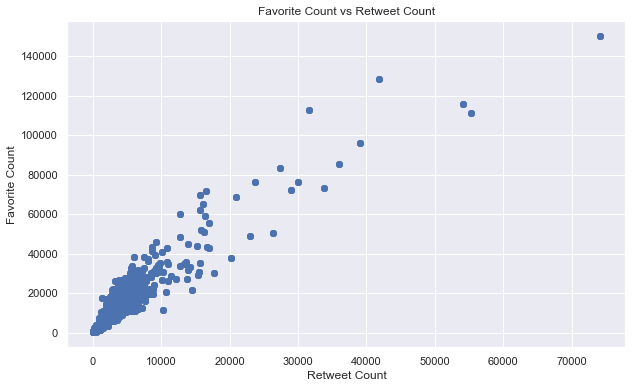

In [607]:
#assign retweet count to the x axis
x = new_df['retweet_count']
#assign favorite count to the y axis
y = new_df['favorite_count']
#scatter plot both axises
plt.scatter(x,y)
#assign labels to both axis
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.title('Favorite Count vs Retweet Count')
plt.show()

In [608]:
new_df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,4971.000000,4971.000000
mean,2403.482800,8333.342788
std,4367.543654,12260.855511
min,11.000000,69.000000
25%,540.000000,1882.000000
50%,1193.000000,3882.000000
75%,2721.000000,10280.000000
max,74154.000000,150298.000000


__In the Figure above it appears that the number of retweets is directly proportional with the number of favorites,which gives us an insight of how users interact with different tweets__

([<matplotlib.patches.Wedge at 0x1b0839ad370>,
 [Text(0.7138406481199853, 0.8369178747593098, 'golden_retriever'),
  Text(-0.939040332674885, 0.5728902631480497, 'Labrador_retriever'),
  Text(-0.6801478086402301, -0.8645223874497949, 'Chihuahua'),
  Text(0.4041268866098512, -1.0230745131802612, 'Pembroke'),
  Text(1.0257194703997086, -0.3973657862007516, 'Cardigan')],
 [Text(0.3893676262472646, 0.45650065895962344, '27.5%'),
  Text(-0.5122038178226644, 0.3124855980807544, '27.5%'),
  Text(-0.3709897138037618, -0.4715576658817063, '18.7%'),
  Text(0.22043284724173698, -0.5580406435528698, '14.5%'),
  Text(0.5594833474907501, -0.21674497429131903, '11.8%')])

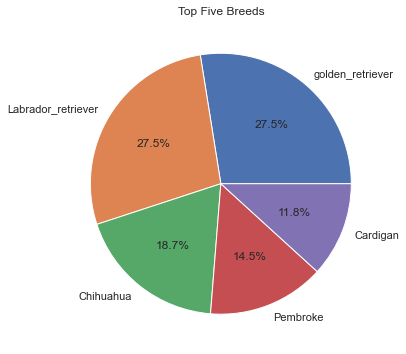

In [609]:
#Top Five predicted breeds
pred = new_df.prediction.value_counts().sort_values(ascending=False).head(5)
#assign label to the figure
plt.title('Top Five Breeds')
plt.pie(pred,labels = pred.index,autopct='%1.1f%%')

__This Figure above shows the top five breeds,out of them both the golden retriever and labrador retriever appear to be the top two breeds predicted with the same percent,which gives us an insight that people love to pet those two breeds the most__

Text(0, 0.5, 'Rating')

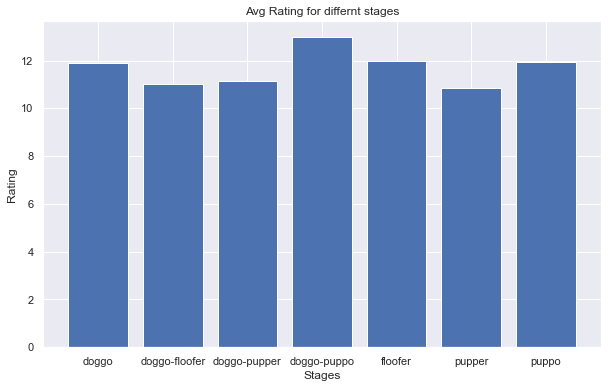

In [610]:
#group by stage column
#get mean rating for each stage
rate = new_df.groupby(['stage']).rating.mean()
#plot the rating
plt.bar(rate.index,rate,color='b')
plt.title('Avg Rating for differnt stages')
plt.xlabel('Stages')
plt.ylabel('Rating')

__from this figure we Get that the doggo-puppo stage is the most rated one out of all the stages__

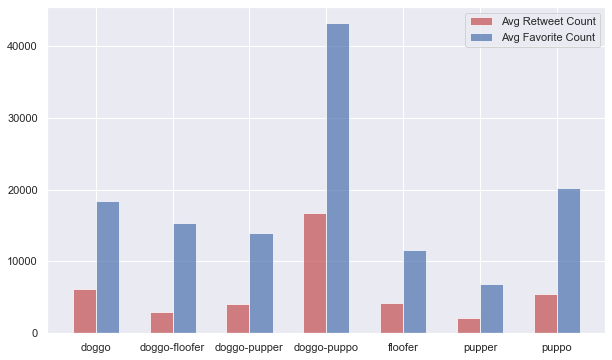

In [611]:
#group by stage
#get the average retweet count for each dog stage
avg_retweet_count_dog_stage = new_df.groupby('stage').retweet_count.mean()

# the average retweet count index stand for the x axis in plotting 
avg_retweet_count_dog_stage.index
#group by stage
#get the average favorite count for each dog stage
avg_favorite_count_dog_stage = new_df.groupby('stage').favorite_count.mean()  

width = .3
ind = np.arange(len(avg_favorite_count_dog_stage))
locations = ind+width/2
labels = (avg_retweet_count_dog_stage.index)
plt.bar(ind, avg_retweet_count_dog_stage, width, color='r', alpha=.7, label='Avg Retweet Count')
plt.bar(ind + width, avg_favorite_count_dog_stage, width, color='b', alpha=.7, label='Avg Favorite Count')
plt.xticks(locations, labels)
plt.legend()

__In this visualization we see that the doggo-puppo stage comes with the most favorite count,retweet count also is quite high in regerad with the other different stages,which draws conclusions that its the most like dog stage of all,and pupper stage is quite the opposite.<br>
we get also from the numbers of retweets and favorites that people tend to interact with tweets in the form of favorite more than retweets.<br>__